# Домашнее задание № 2
## Дедлайн &mdash; 2 AM 16 ноября 2017

## Задача 1. ALS vs градиентный спуск

1. Сгенерируйте случайную малоранговую матрицу $X$ размером $1000 \times 1000$ и ранга $100$
2. Решите следующую задачу оптимизации с помощью градиентного спуска по параметрам $U, V$ и с помощью метода ALS (Alternating Least Squares)
$$
\min_{U, V} \| X - U^{\top}V\|^2_F.
$$
Метод ALS заключается в следующем
    - задаётся начальное приближение $U_0$ и $V_0$
    - фиксируется $U$ и ищется минимум по переменной $V$ соответственно
    - фиксируется найденное значение $V$ и оптимизируется значение $U$
    - и так далее до сходимости
3. Сравните сходимость ALS и градиентного спуска для этой задачи
4. Исследуйте зависимость от начального приближения и объясните её
5. Рассмотрите различные способы выбора шага в градиентном спуске и сделайте вывод о применимости каждого из них

||u0 - u|| and ||v0 - v||, where u, v - solutions:  34.247870811 129.182985708
GD, fixed step. iters =  161  F =  9924.56212596
GD, vary step. iters =  300  F =  9934.82855149
ALS. iters =  186  F =  9924.56214979


'\nniters_GD = []\nnsteps = []\nu0 = np.random.randn(n).reshape(1, n)\nv0 = np.random.randn(n).reshape(1, n)\nfor i in range(2, 6):\n    step = 1e-4 * i\n    u1, v1, niters1 = GradientDescent(F, gradF_u, gradF_v, u0, v0, step, step, maxiter=500)\n    niters_GD.append(niters1)\n    nsteps.append(step)\n\nplt.figure(figsize=(10, 8))\nplt.plot(nsteps, niters_GD)\nplt.title("Dependence from time step for GD", fontsize=14)\nplt.xlabel("step", fontsize=12)\n#plt.xscale("log")\nplt.ylabel("iterations", fontsize=12)\n'

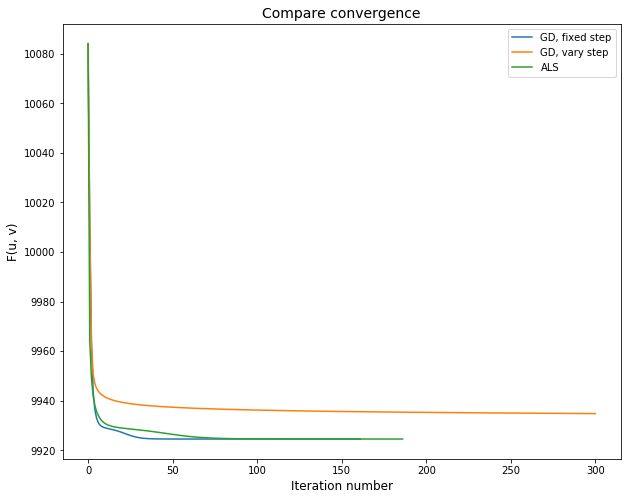

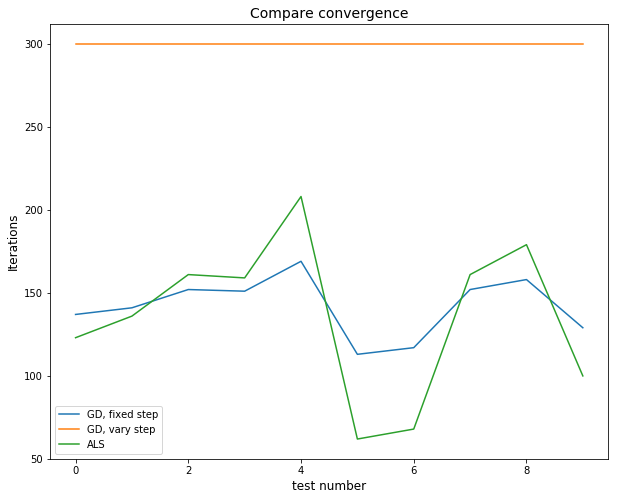

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

def rand_matrix(n, rank):
    mat = 0.0 * np.eye(n)
    for i in range(rank):
        a = np.random.randn(n).reshape(1, n)
        b = np.random.randn(n).reshape(n, 1)
        mat = mat + b.dot(a)
        
    return mat

def GradientDescent(F, gradF_u, gradF_v, u0, v0, step_u0, step_v0, varyStep=False, eps=1e-4, maxiter=100):
    u = u0
    v = v0
    uv_hist = [F(u, v)]
    err_u = 1.0
    err_v = 1.0
    step_u = step_u0
    step_v = step_v0
    
    n_iter = 0
    while err_u > eps and err_v > eps and n_iter < maxiter:
        # from previous step
        uold = u
        vold = v
        # Step for GD
        gradF = gradF_u(u, v)
        #gradF = gradF / norm(gradF, 2)
        u = u - step_u * gradF
        
        gradF = gradF_v(u, v)
        #gradF = gradF / norm(gradF, 2)
        v = v - step_v * gradF
        
        uv_hist.append(F(u, v))
        # errors
        #err_u = norm(uold - u, 2) / norm(u, 2)
        #err_v = norm(vold - v, 2) / norm(v, 2)
        err_u = norm(gradF_u(u, v), 2)
        err_v = norm(gradF_v(u, v), 2)
        
        n_iter = n_iter + 1
        
         
        if varyStep:
            step_u = step_u0 / float(n_iter)
            step_v = step_v0 / float(n_iter)
        
    return u, v, uv_hist, n_iter

# Alternating Least Squares method
def ALS(F, gradF_u, gradF_v, zeroGradF_u, zeroGradF_v, u0, v0, zeroGradAreGiven=True, eps=1e-4, maxiter=100):
    u = u0
    v = v0
    uv_hist = [F(u, v)]
    err_u = 1.0
    err_v = 1.0
    
    n_iter = 0
    while err_u > eps and err_v > eps and n_iter < maxiter:
        if zeroGradAreGiven:
            #from previous step
            uold = u
            vold = v
            # v is fixed. Find u:
            u = zeroGradF_u(v)
            # u is fixed. Find v:
            v = zeroGradF_v(u)
            
            uv_hist.append(F(u, v))
            # errors
            err_u = norm(uold - u, 2) / norm(u, 2)
            err_v = norm(vold - v, 2) / norm(v, 2)
        else:
            # need to find u: gradF_u(u, v) = 0 and v: gradF_v(u, v) = 0, using Newton's method for example
            print("...")
            break
            
        n_iter = n_iter + 1
            
    return u, v, uv_hist, n_iter


n, rank = 1000, 100

X = rand_matrix(n, rank)
F = lambda u, v: np.linalg.norm(X - u.T.dot(v), ord='fro')
gradF_u = lambda u, v: -2.0 * v.dot(X.T - v.T.dot(u))
gradF_v = lambda u, v: -2.0 * u.dot(X - u.T.dot(v))
# return u, where u is a solution of gradF_u(u, v) = 0, where v is fixed
zeroGradF_u = lambda v: v.dot(X.T) / v.dot(v.T)
# return v, where v is a solution of gradF_v(u, v) = 0, where u is fixed
zeroGradF_v = lambda u: u.dot(X) / u.dot(u.T)

u0 = np.random.randn(n).reshape(1, n)
v0 = np.random.randn(n).reshape(1, n)

u, v, histGD, niters = GradientDescent(F, gradF_u, gradF_v, u0, v0, 5e-4, 5e-4, maxiter=300)
print("||u0 - u|| and ||v0 - v||, where u, v - solutions: ", norm(u0 - u_sol, 2), norm(v0 - v_sol, 2))
print("GD, fixed step. iters = ", niters, " F = ", F(u, v))

# bad convergence...
u, v, histVaryGD, niters = GradientDescent(F, gradF_u, gradF_v, u0, v0, 5e-4, 5e-4, varyStep=True, maxiter=300)
print("GD, vary step. iters = ", niters, " F = ", F(u, v))

u, v, histALS, niters = ALS(F, gradF_u, gradF_v, zeroGradF_u, zeroGradF_v, u0, v0, maxiter=300)
print("ALS. iters = ", niters, " F = ", F(u, v))

u_sol, v_sol = u, v

plt.figure(figsize=(10, 8))
plt.plot(histGD, label="GD, fixed step")
plt.plot(histVaryGD, label="GD, vary step")
plt.plot(histALS, label="ALS")
plt.title("Compare convergence", fontsize=14)
plt.xlabel("Iteration number", fontsize=12)
plt.ylabel("F(u, v)", fontsize=12)
plt.legend()

niters_GD = []
niters_VaryGD = []
niters_ALS = []
for i in range(0, 10):
    u0 = np.random.randn(n).reshape(1, n)
    v0 = np.random.randn(n).reshape(1, n)
    
    #u0 = u_sol + u0 * (2.0**(-i) / norm(u0, 2))
    #v0 = v_sol + v0 * (2.0**(-i) / norm(v0, 2))
    #print("||u0 - u|| and ||v0 - v||, where u, v - solutions: ", norm(u0 - u_sol, 2), norm(v0 - v_sol, 2))
    
    u1, v1, histGD, niters1 = GradientDescent(F, gradF_u, gradF_v, u0, v0, 5e-4, 5e-4, maxiter=300)
    niters_GD.append(niters1)
    
    u2, v2, histGD, niters2 = GradientDescent(F, gradF_u, gradF_v, u0, v0, 5e-4, 5e-4, varyStep=True, maxiter=300)
    niters_VaryGD.append(niters2)
    
    u3, v3, histALS, niters3 = ALS(F, gradF_u, gradF_v, zeroGradF_u, zeroGradF_v, u0, v0, maxiter=300)
    niters_ALS.append(niters3)
    
    #print("For fixed GD: ", niters1, F(u1, v1), " For vary GD: ", niters2, F(u2, v2), " For ALS: ", niters3, F(u3, v3))
  
plt.figure(figsize=(10, 8))
plt.plot(niters_GD, label="GD, fixed step")
plt.plot(niters_VaryGD, label="GD, vary step")
plt.plot(niters_ALS, label="ALS")
plt.title("Compare convergence", fontsize=14)
plt.xlabel("test number", fontsize=12)
plt.ylabel("Iterations", fontsize=12)
plt.legend()

'''
niters_GD = []
nsteps = []
u0 = np.random.randn(n).reshape(1, n)
v0 = np.random.randn(n).reshape(1, n)
for i in range(2, 6):
    step = 1e-4 * i
    u1, v1, niters1 = GradientDescent(F, gradF_u, gradF_v, u0, v0, step, step, maxiter=500)
    niters_GD.append(niters1)
    nsteps.append(step)

plt.figure(figsize=(10, 8))
plt.plot(nsteps, niters_GD)
plt.title("Dependence from time step for GD", fontsize=14)
plt.xlabel("step", fontsize=12)
#plt.xscale("log")
plt.ylabel("iterations", fontsize=12)
'''

## Задача 2. PageRank

1. Опишите алгоритм PageRank (введите все необходимые обозначения)
2. Как связаны задачи нахождения PageRank'а и поиска максимального собственноо вектора и соответствующего ему собственного значения и почему?
3. Реализуйте степенной метод нахождения максимального собственного вектора
4. Найдите с помощью степенного метода TOP-10 статей по величине PageRank'a по физике высоких энергий в соответствии с [графом](https://snap.stanford.edu/data/cit-HepTh.html). Результат должен быть воспроизводим, используйте разреженные матрицы для работы с матрицей смежности графа
5. Сравните теоретическую и экспериментальную сходимость степенного метода для этого графа. Нарисуйте график и объясните, почему он выглядит именно так?

In [2]:
# description

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

def rand_matrix(n, rank):
    mat = 0.0 * np.eye(n)
    for i in range(rank):
        a = np.random.randn(n).reshape(1, n)
        b = np.random.randn(n).reshape(n, 1)
        mat = mat + b.dot(a)
        
    return mat

def findMaxEvalue(A, y0, eps=1e-4, maxiter=10000):
    x = y0 / norm(y0, 2)
    err = 1.0
    
    n_iter = 0
    while err > eps and n_iter < maxiter:
        xold = x
        
        y = A.dot(x)
        x = y / norm(y, 2)
        
        err = norm(x - xold, 2)
        
        n_iter = n_iter + 1
        
    return x, x.T.dot(A.dot(x)), n_iter

n = 1000
A = np.random.randn(n, n)
# do symmetric
A = (A + A.T) / 2.0 

v0 = np.random.randn(n).reshape(n, 1)
v, l, niters = findMaxEvalue(A, v0)
print(niters, l)

L, V = np.linalg.eig(A)
print(max(abs(L)))


7765 [[ 44.55319268]]
44.553192905


## Задача 3. Регуляризация

1. Сгенерируйте случайную малоранговую матрицу $X$ $500 \times 100$ ранга $10$
2. Сгенерируйте случайный вектор $w$ размера $100$ и целевой вектор 
$$
y = Xw + \varepsilon,
$$
где $\varepsilon$ - вектор с элементами из нормального распределения с нулевым средним и дисперсией $0.01$. 
3. Сравните разреженность и точность решения, которое дают методы регуляризации рассмотренные на лекции. Сделайте вывод об их эффективности. Рассмотрите, как автоматический подбор параметра регуляризации, так и эвристический подбор. Сравните эффективность методов. 
4. Проведите аналогичный эксперимент, но на данных, в которых целевой вектор сгенерирован так, что он хорошо аппроксимируется как одним признаком, так и линейной комбинацией двух или трёх других признаков. Выделяют ли методы регуляризации подобные зависимости в данных? Почему?
5. Добавьте в сгенерированную выборку несколько (5-10) выбросов, то есть таких строк и соответствующих им значений в $y$, что они не подчиняются ранее заданному закону.
6. Проверьте как изменится точность решения задачи для ранее рассмотренных методов
7. Сравните предыдущие методы регуляризации с [регуляризацией Huber'a](https://en.wikipedia.org/wiki/Huber_loss). Какой способ устойчивее к выбросам и почему?
8. Получите аналитическое решение задачи
$$
\min_w \|Xw - y\|^2_2 + \| \lambda \odot w \|^2_2,
$$
где $\lambda$ - вектор такой же размерности, что и $w$, $\odot$ означает поэлементное умножение двух векторов

In [3]:
# Your code is here